In [223]:
# Diabetes Prediction Using Machine Learning

In [224]:
# importing the necessary libraries
#from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [225]:
#Loading the dataset
diabetes_data = pd.read_csv('diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [226]:
diabetes_data.shape

(768, 9)

In [227]:
## gives information about the data types,columns, null value counts, memory usage etc

diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [228]:
diabetes_data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [229]:
diabetes_data.describe().T 

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [230]:
diabetes_data_copy = diabetes_data.copy(deep = True) 

diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


In [231]:
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


#### To fill these Nan values the data distribution needs to be understood

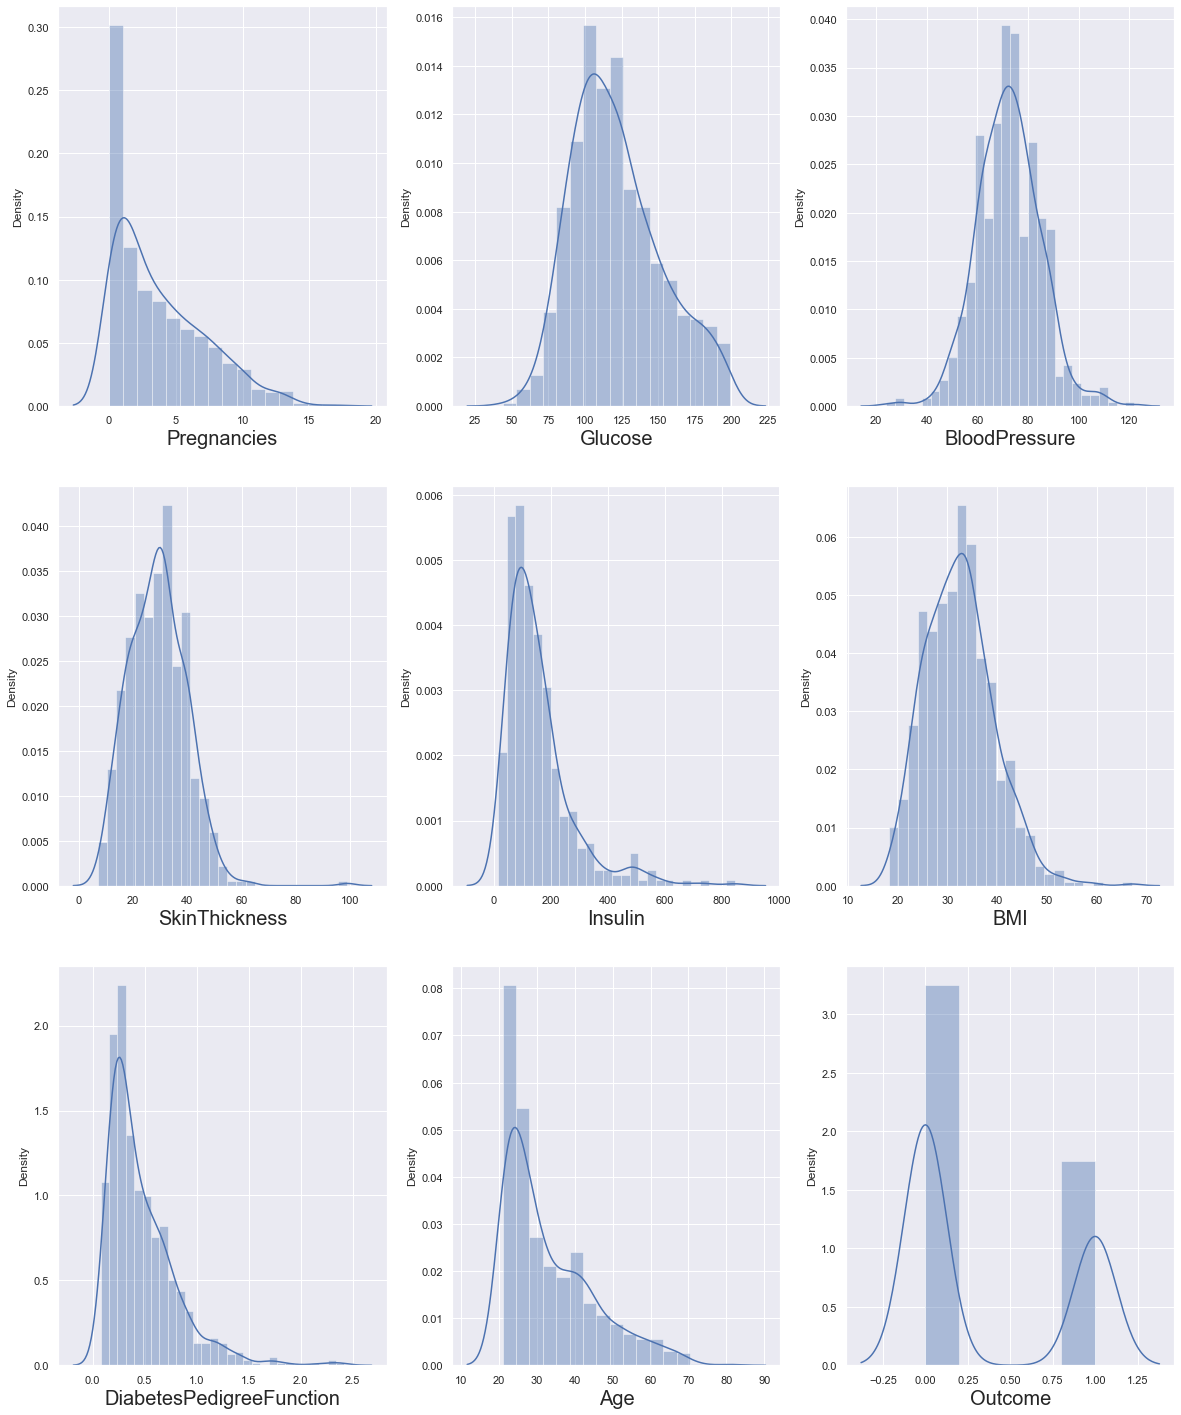

In [232]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in diabetes_data_copy:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(diabetes_data_copy[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

### Aiming to impute nan values for the columns in accordance with their distribution

In [233]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [234]:
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [235]:
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [236]:
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy.isna().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [237]:
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)
diabetes_data_copy.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Finally we have imputated all the missing values

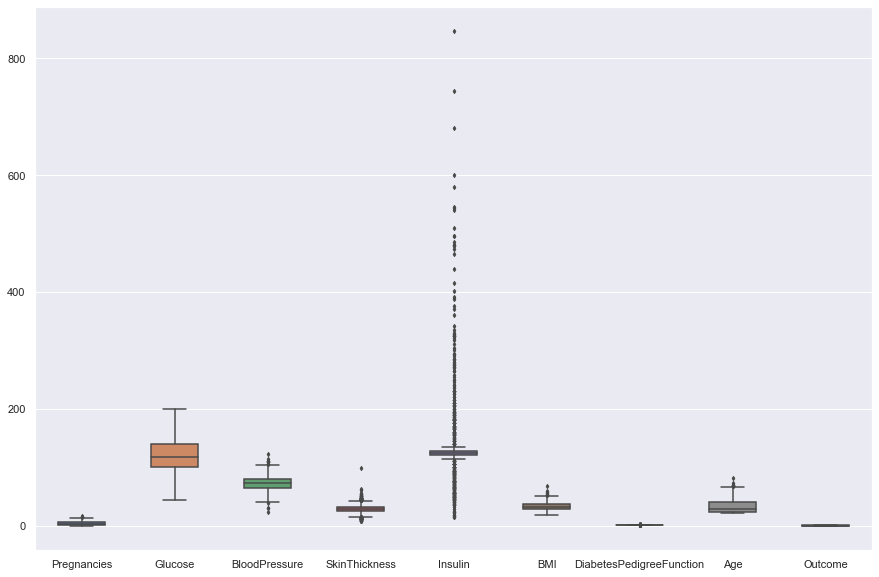

In [238]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=diabetes_data_copy, width= 0.5,ax=ax,  fliersize=3)

In [239]:
q = diabetes_data_copy['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = diabetes_data_copy[diabetes_data_copy['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

## Plotting after Nan removal 

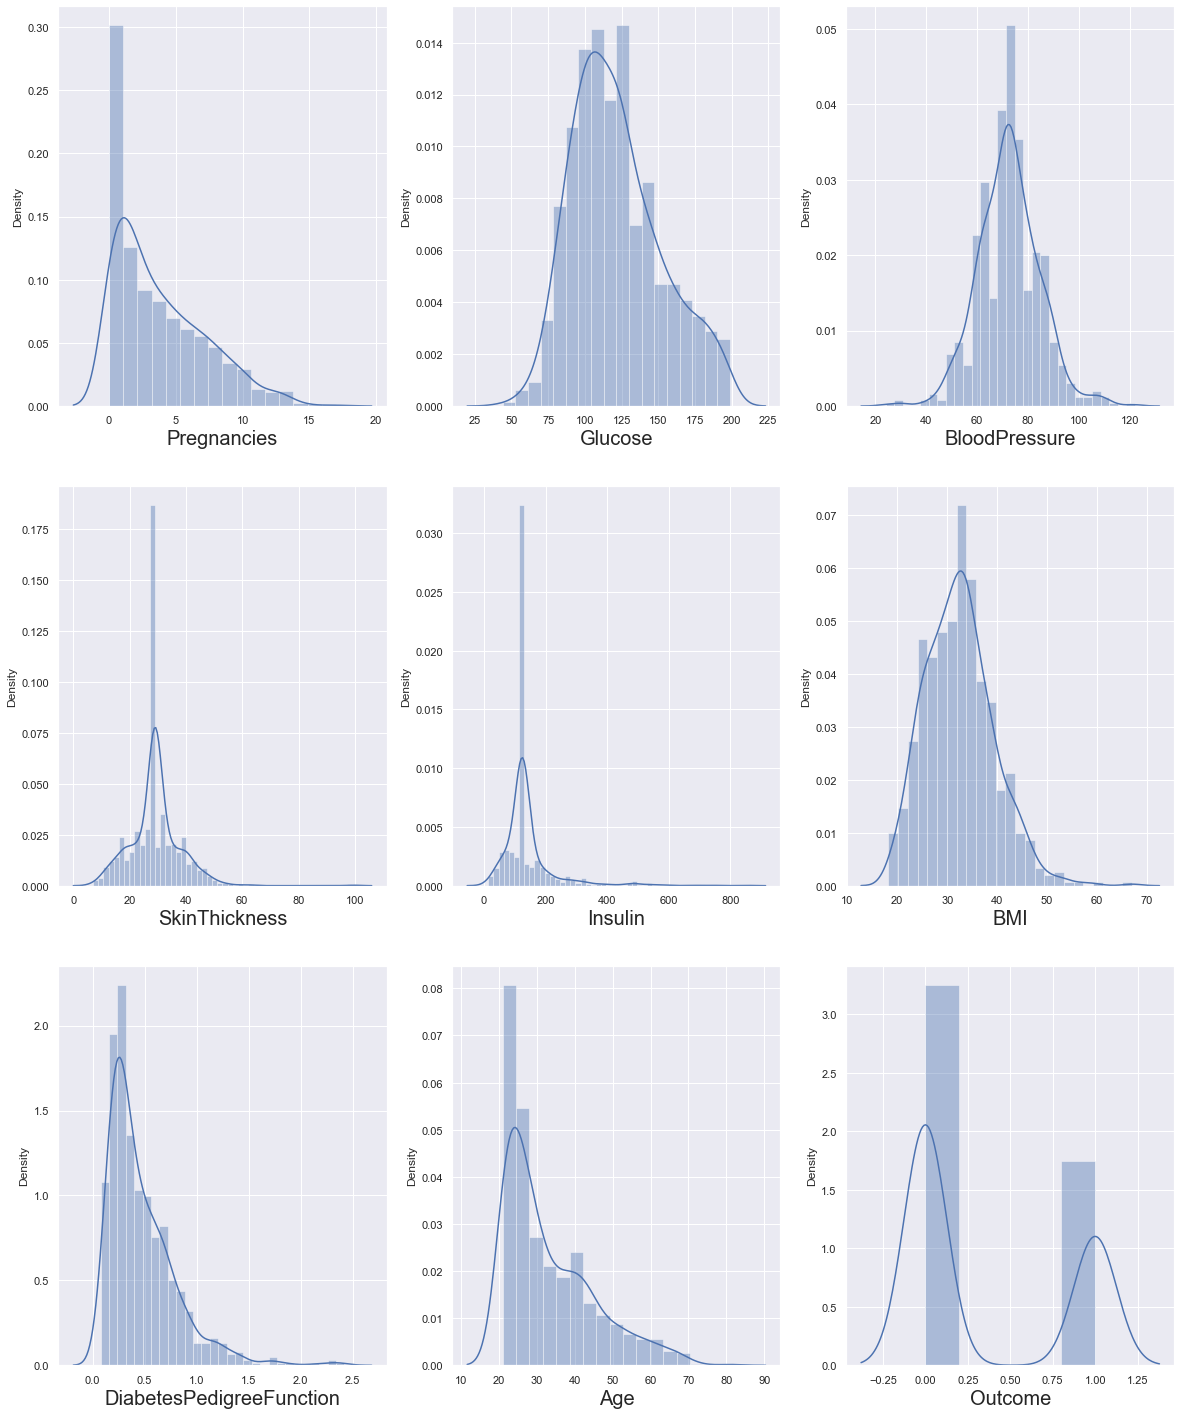

In [240]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in diabetes_data_copy:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(diabetes_data_copy[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [241]:

diabetes_data.shape

(768, 9)

In [242]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [243]:
diabetes_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

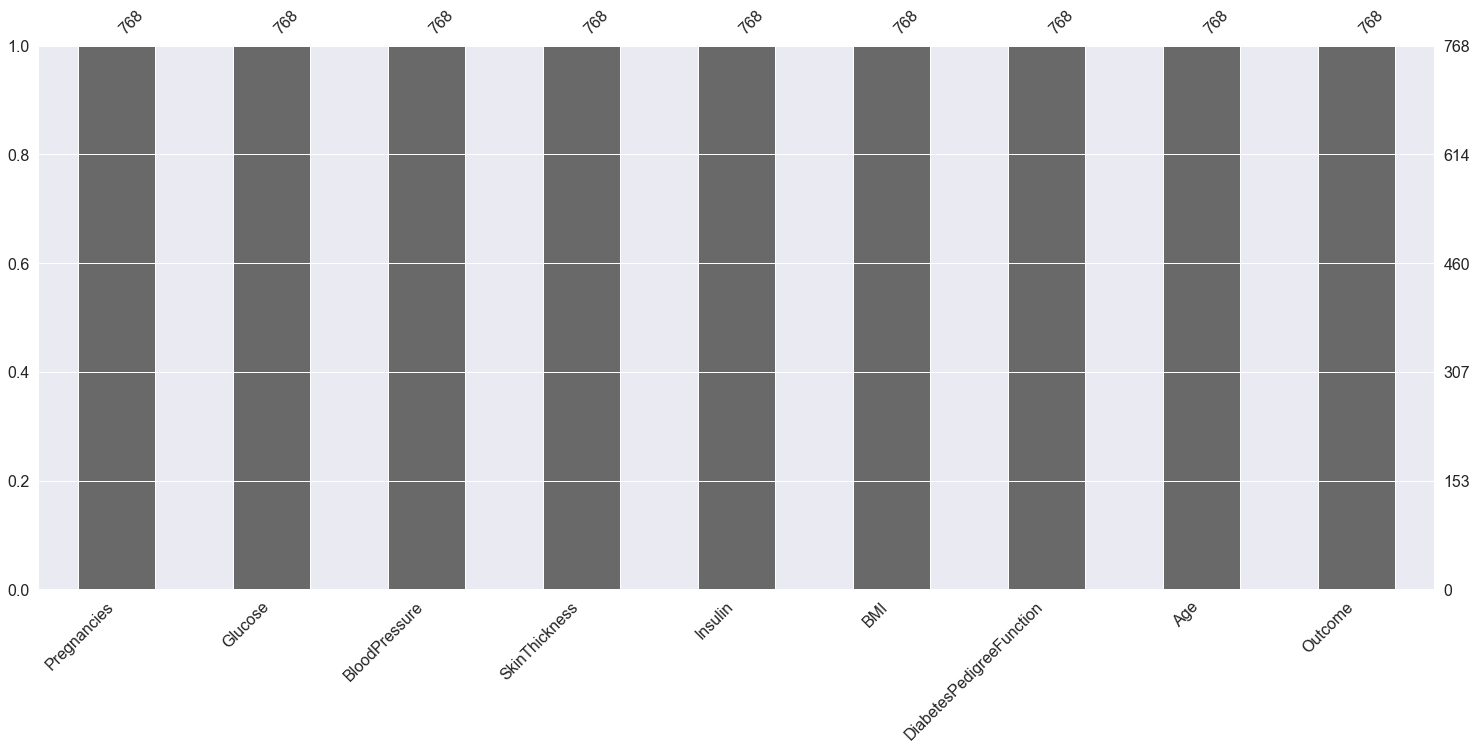

In [244]:
!pip install missingno
import missingno as msno
p=msno.bar(diabetes_data)


0    500
1    268
Name: Outcome, dtype: int64


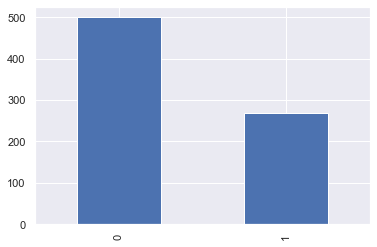

In [245]:

print(diabetes_data.Outcome.value_counts())
p=diabetes_data.Outcome.value_counts().plot(kind="bar")


#### Scatter matrix of uncleaned data

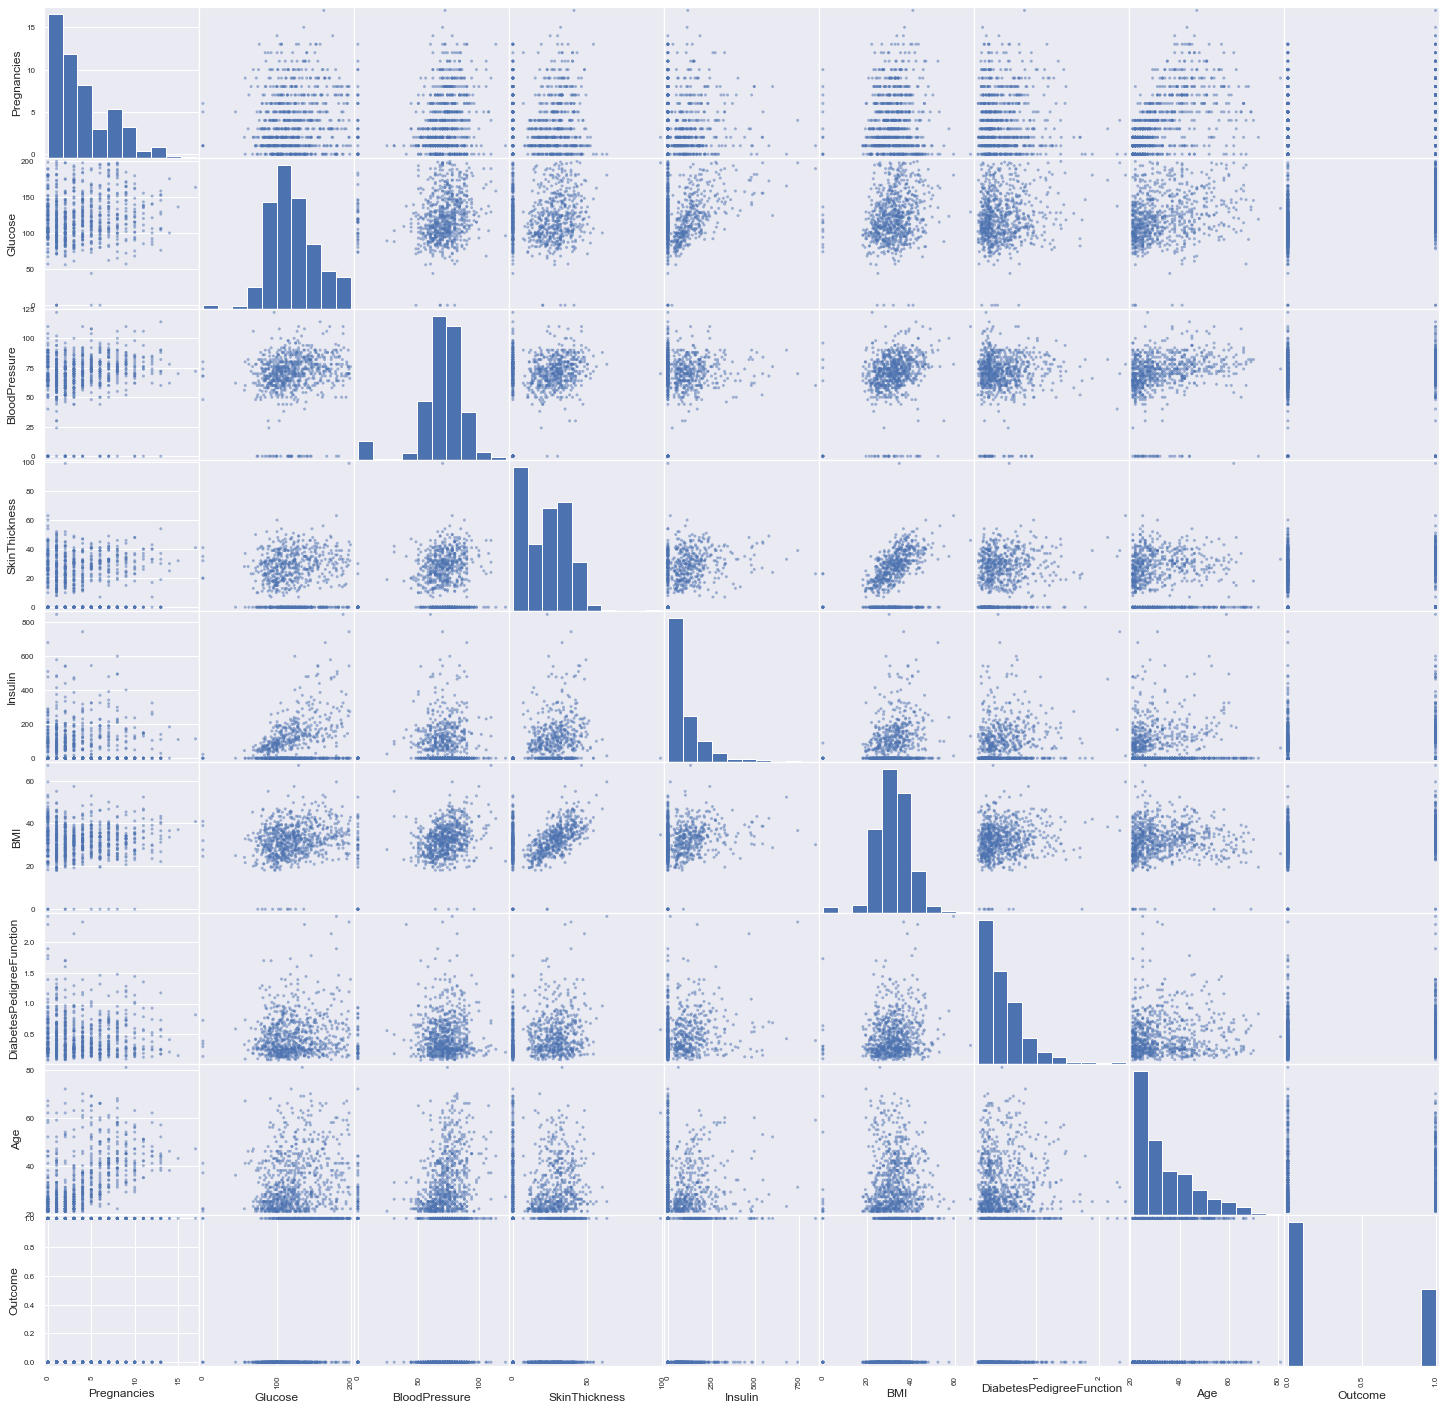

In [246]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(diabetes_data,figsize=(25, 25))

#### Pair plot for clean data

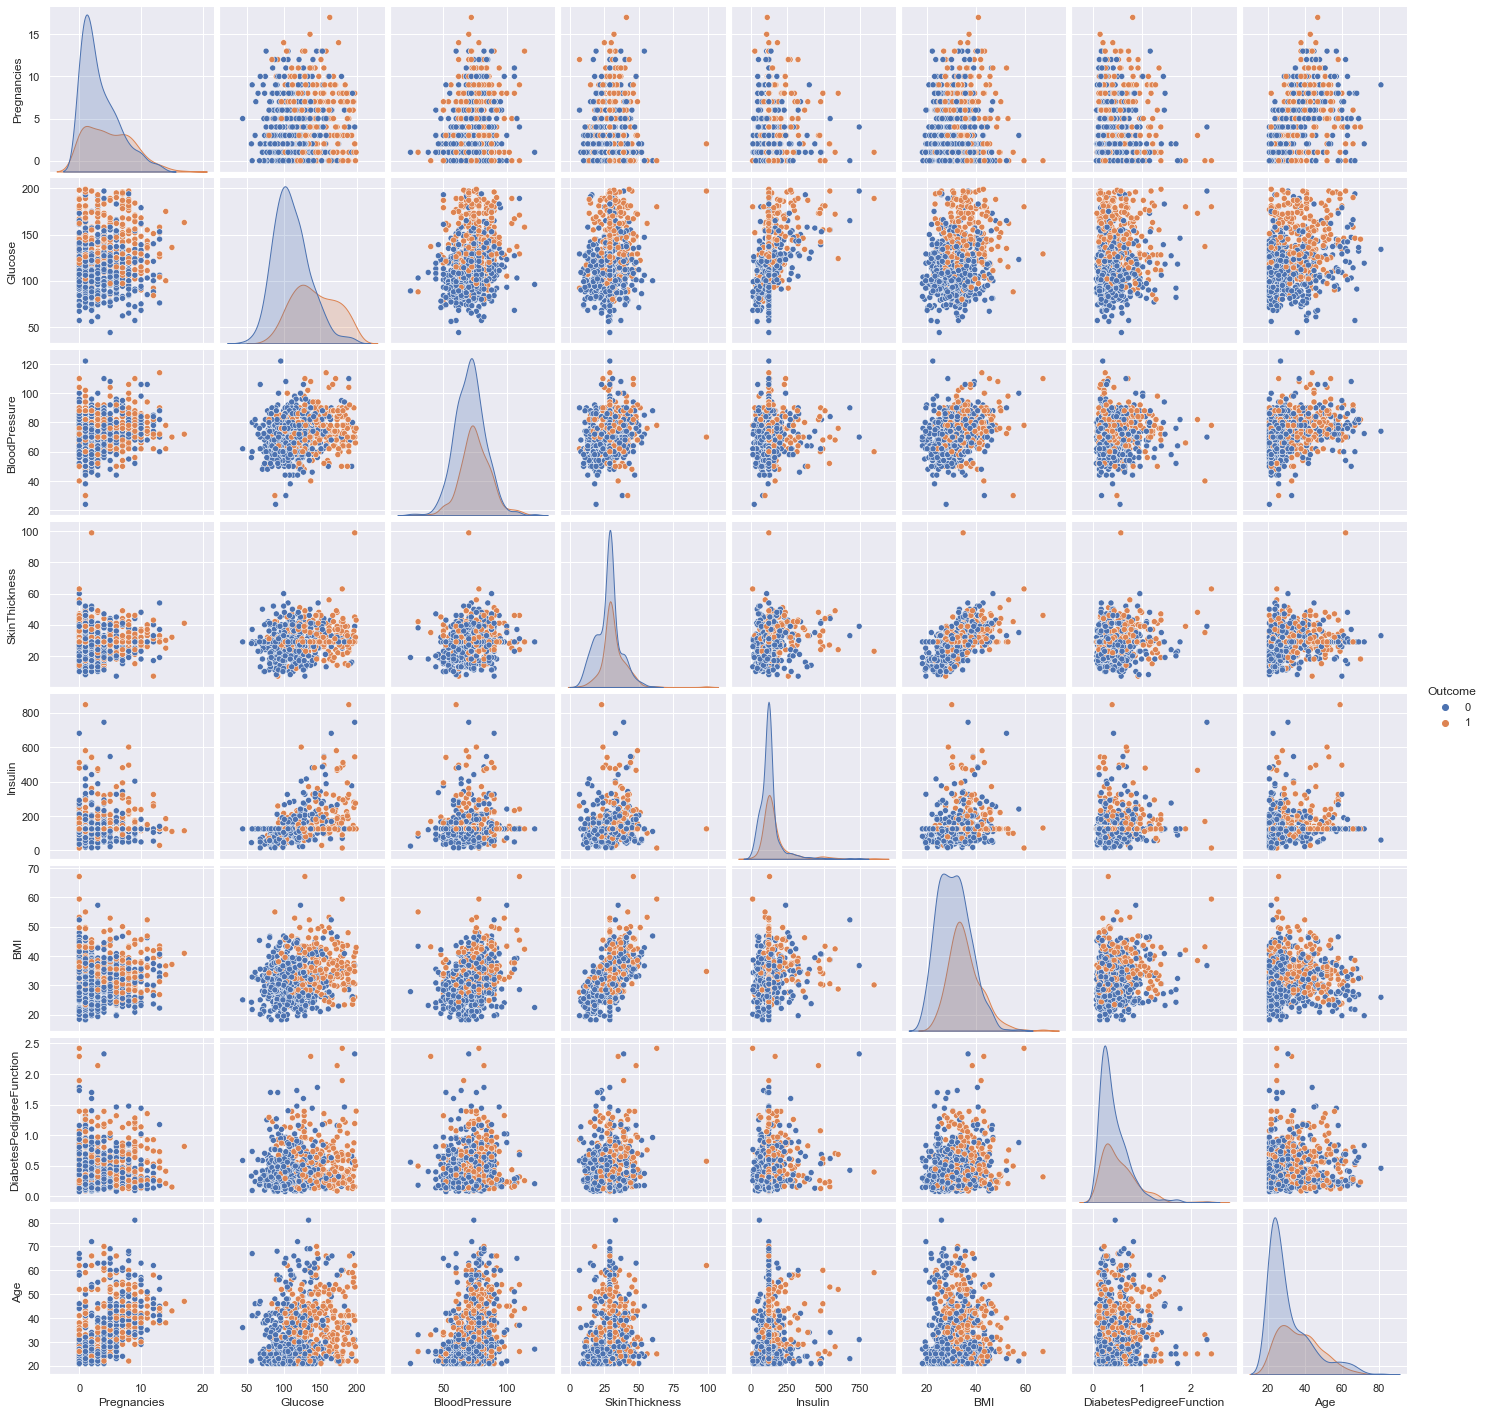

In [247]:
p=sns.pairplot(diabetes_data_copy, hue = 'Outcome')

#### Heatmap for unclean data

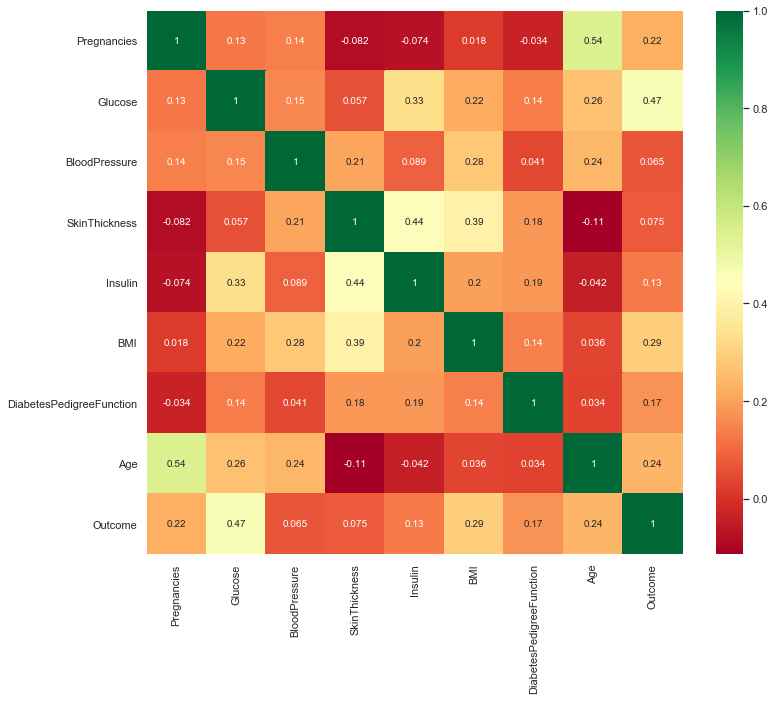

In [248]:
plt.figure(figsize=(12,10)) 
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')  

#### Heatmap for clean data

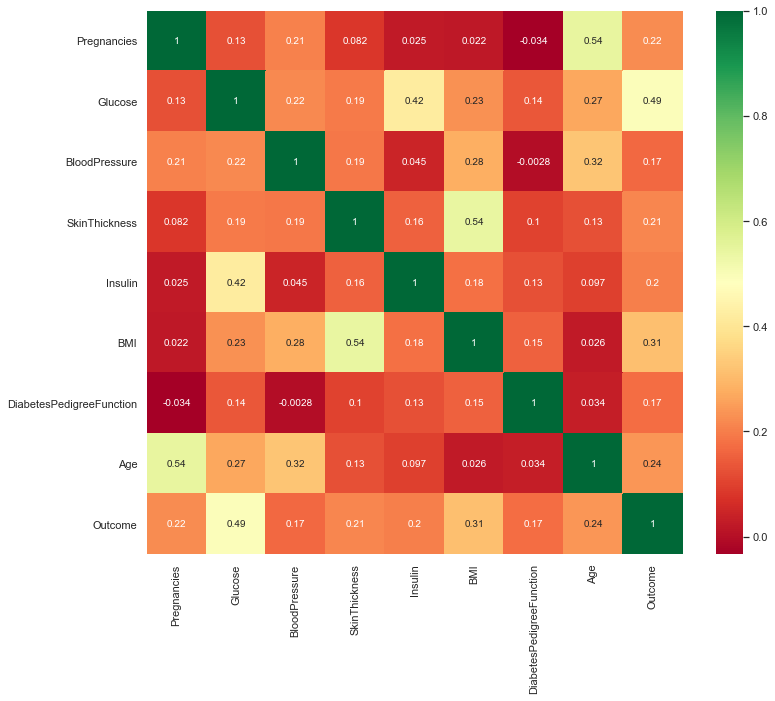

In [249]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(diabetes_data_copy.corr(), annot=True,cmap ='RdYlGn')

In [250]:
diabetes_data_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [251]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [252]:
X.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [253]:
y = diabetes_data_copy.Outcome 

In [299]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x1=sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),) 


In [298]:
vif = pd.DataFrame()

vif["vif"] = [variance_inflation_factor(x1,i) for i in range(x1.shape[1])]
vif["Features"] = X.columns
vif

,vif,Features
0,1.430478,Pregnancies
1,1.360359,Glucose
2,1.242284,BloodPressure
3,1.451040,SkinThickness
4,1.238926,Insulin
5,1.572627,BMI
6,1.048389,DiabetesPedigreeFunction
7,1.615774,Age


In [254]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42,)

In [255]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(1)
knn.fit(X_train,y_train)
    

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [256]:
pred = knn.predict(X_test)

In [257]:
print(confusion_matrix(y_test,pred))

[[135  32]
 [ 37  52]]


In [258]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       167
           1       0.62      0.58      0.60        89

    accuracy                           0.73       256
   macro avg       0.70      0.70      0.70       256
weighted avg       0.73      0.73      0.73       256



In [259]:
from sklearn.model_selection import cross_val_score
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'accuracy Rate')

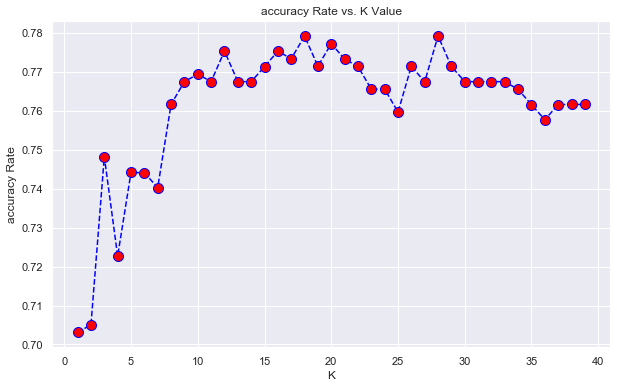

In [260]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('accuracy Rate')

In [261]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[135  32]
 [ 37  52]]


              precision    recall  f1-score   support

           0       0.78      0.81      0.80       167
           1       0.62      0.58      0.60        89

    accuracy                           0.73       256
   macro avg       0.70      0.70      0.70       256
weighted avg       0.73      0.73      0.73       256



In [262]:
knn = KNeighborsClassifier(n_neighbors=36)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=36')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=36


[[151  16]
 [ 51  38]]


              precision    recall  f1-score   support

           0       0.75      0.90      0.82       167
           1       0.70      0.43      0.53        89

    accuracy                           0.74       256
   macro avg       0.73      0.67      0.67       256
weighted avg       0.73      0.74      0.72       256



In [263]:
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(36)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.73828125

In [264]:
from sklearn.linear_model import LogisticRegression

In [265]:
Log_Reg=LogisticRegression()

In [266]:
Log_Reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [267]:
y_pred = Log_Reg.predict(X_test)

In [268]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.73046875

In [269]:
print(confusion_matrix(y_test,pred))

print(classification_report(y_test,pred))


[[151  16]
 [ 51  38]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       167
           1       0.70      0.43      0.53        89

    accuracy                           0.74       256
   macro avg       0.73      0.67      0.67       256
weighted avg       0.73      0.74      0.72       256



In [270]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(estimator=LogisticRegression(penalty='l2'), param_grid=param_grid)

In [271]:
clf.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [272]:
y_pred = clf.predict(X_test)

In [273]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.734375

In [274]:
from sklearn.ensemble import RandomForestClassifier


In [275]:
rf=RandomForestClassifier()

In [276]:
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 4, 1), "max_features": ['auto', 'log2']}

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,  verbose=3)
         
grid.fit(X_train,y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.728, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.728, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.725, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.735, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.755, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.767, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.728, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.775, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.735, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.755, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=100, score=0.786

[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=100, score=0.725, total=   0.2s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=100, score=0.765, total=   0.3s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=0.786, total=   0.3s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=0.757, total=   0.3s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=0.765, total=   0.3s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=0.745, total=   0.3s
[CV] criterion=gini, max_depth=3, max_features=auto

[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=0.777, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=0.738, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=0.775, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=0.745, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=0.775, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=100, score=0.767, total=   0.3s
[CV] criterion=entropy, max

[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=100, score=0.775, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=100, score=0.735, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=100, score=0.755, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=130, score=0.786, total=   0.8s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=130, score=0.757, total=   0.6s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=130, score=0.784, total=   0.7s
[CV] criterion=ent

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   37.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [277]:
criterion = grid.best_params_['criterion']
max_depth = grid.best_params_['max_depth']
max_features = grid.best_params_['max_features']
n_estimators = grid.best_params_['n_estimators']

         
clf = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion,
                                              max_depth=max_depth, max_features=max_features)

clf.fit(X_train,y_train)         

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [278]:
y_pred = clf.predict(X_test)

In [279]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.73046875